In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

A) Reading the file

In [3]:
df = pd.read_csv('bengaluru_house_prices.csv')
df_b = df.copy()
df_b.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

# data cleaning

In [4]:
df_b.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [5]:
df_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


<Axes: >

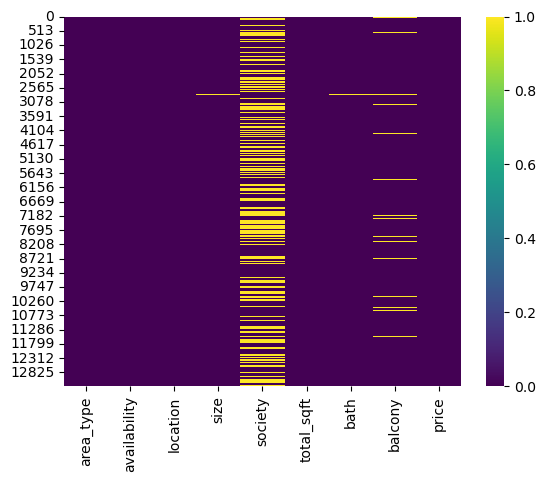

In [6]:
sns.heatmap(df_b.isnull(),cbar = True, cmap='viridis')

dropped society column

In [7]:
df_b.drop('society', axis=1,inplace =True)
df_b

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


<Axes: >

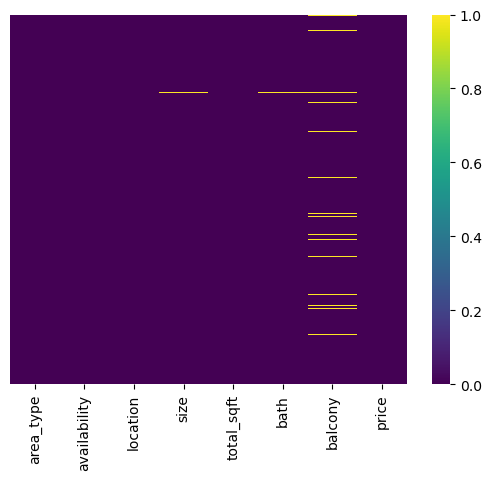

In [8]:
sns.heatmap(df_b.isnull(),yticklabels=False, cbar = True, cmap='viridis')

In [9]:
df_b.isnull().sum()
# print(df_b.balcony.value_counts())
# df_b.balcony.sort_values(ascending=False)

area_type         0
availability      0
location          1
size             16
total_sqft        0
bath             73
balcony         609
price             0
dtype: int64

took most_frequent value as balcony fill

In [10]:
df_si_imp = SimpleImputer(strategy= 'most_frequent', add_indicator=True)
df_si_imp.fit_transform(df_b[['balcony']])
b = pd.DataFrame(df_si_imp.fit_transform(df_b[['balcony']]))
b
df_b['balcony'] = df_si_imp.fit_transform(df_b[['balcony']])
df_b

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,2.0,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [11]:
df_b.isnull().sum()

area_type        0
availability     0
location         1
size            16
total_sqft       0
bath            73
balcony          0
price            0
dtype: int64

dropped all other nan values

In [12]:
df_b.dropna(inplace=True)

In [13]:
df_b

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,2.0,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [14]:
df_b.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

<Axes: >

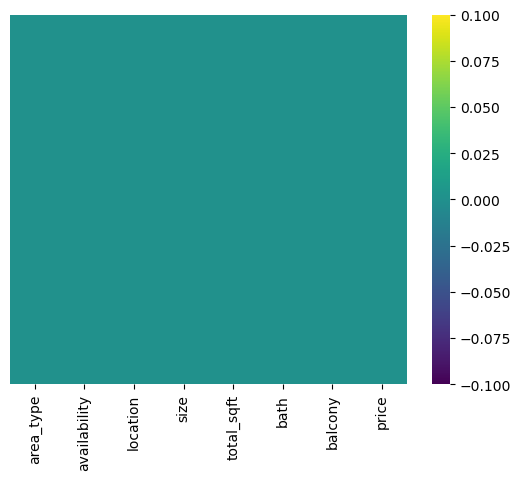

In [15]:
sns.heatmap(df_b.isnull(),yticklabels=False, cbar = True, cmap='viridis')

In [16]:
df_b.columns

Index(['area_type', 'availability', 'location', 'size', 'total_sqft', 'bath',
       'balcony', 'price'],
      dtype='object')

In [17]:
df_b.area_type.value_counts()

area_type
Super built-up  Area    8740
Built-up  Area          2410
Plot  Area              2009
Carpet  Area              87
Name: count, dtype: int64

In [18]:
df_b['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

convert BHK <=> Bedroom

In [19]:
df_b['size'] = df_b['size'].str.replace('Bedroom','BHK')
df_b

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 BHK,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 BHK,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,2.0,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [20]:
df_b['size'].unique()

array(['2 BHK', '4 BHK', '3 BHK', '6 BHK', '1 BHK', '1 RK', '8 BHK',
       '7 BHK', '5 BHK', '11 BHK', '9 BHK', '27 BHK', '10 BHK', '19 BHK',
       '16 BHK', '43 BHK', '14 BHK', '12 BHK', '13 BHK', '18 BHK'],
      dtype=object)

extracted numerical values from bhk

In [21]:
df_b['BHK'] = df_b['size'].str.extract('(\d+)', expand=False)
df_b.drop(columns = ['size', 'availability'], axis=1,inplace=True)
df_b

,area_type,location,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,1440,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,1200,2.0,1.0,51.00,2
...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,3453,4.0,0.0,231.00,5
13316,Super built-up Area,Richards Town,3600,5.0,2.0,400.00,4
13317,Built-up Area,Raja Rajeshwari Nagar,1141,2.0,1.0,60.00,2
13318,Super built-up Area,Padmanabhanagar,4689,4.0,1.0,488.00,4


In [22]:
df_b.groupby('total_sqft')['total_sqft'].value_counts()

total_sqft
1                1
1.25Acres        1
1.26Acres        1
1000           172
1000 - 1285      1
              ... 
995             10
996              4
997              2
998              1
999              3
Name: count, Length: 2067, dtype: int64

found out the non-float values from total_sqft

In [23]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [24]:
df_b[df_b.total_sqft.apply(is_float) == False].total_sqft
# df_b.total_sqft.apply(is_float) == False

30       2100 - 2850
122      3067 - 8156
137      1042 - 1105
165      1145 - 1340
188      1015 - 1540
            ...     
12975     850 - 1060
12990    1804 - 2273
13059    1200 - 1470
13265    1133 - 1384
13299    2830 - 2882
Name: total_sqft, Length: 190, dtype: object

converted all a-b range type values to (a+b)/2, converting all numerical to float and all other to NaN

In [25]:
def range_avg(x):
    parts = x.split('-')
    if(len(parts)==2):
        return (float(parts[0]) + float(parts[1]))/2
    try:
        return float(x)
    except:
        return None

In [26]:
df_b.total_sqft = df_b.total_sqft.apply(range_avg)

In [27]:
df_b.isnull().sum()

area_type      0
location       0
total_sqft    46
bath           0
balcony        0
price          0
BHK            0
dtype: int64

removing all null values

In [28]:
df_b.dropna(inplace=True)
df_b.isnull().sum()
df_b

,area_type,location,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,51.00,2
...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,3453.0,4.0,0.0,231.00,5
13316,Super built-up Area,Richards Town,3600.0,5.0,2.0,400.00,4
13317,Built-up Area,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2
13318,Super built-up Area,Padmanabhanagar,4689.0,4.0,1.0,488.00,4


# feature engineering

In [30]:
len(df_b.location.unique())

len(df_b.area_type.unique())

4

We need to reduce dimensions

In [31]:
df_b.groupby('location').value_counts()

location              area_type             total_sqft  bath  balcony  price   BHK
 Anekal               Built-up  Area        351.0       1.0   1.0      16.00   1      1
 Banaswadi            Super built-up  Area  527.0       1.0   0.0      35.00   1      1
 Basavangudi          Super built-up  Area  670.0       1.0   1.0      50.00   1      1
 Bhoganhalli          Super built-up  Area  296.0       1.0   0.0      22.89   1      1
 Devarabeesana Halli  Built-up  Area        1750.0      3.0   3.0      149.00  3      1
                                                                                     ..
tc.palya              Plot  Area            1020.0      2.0   1.0      62.00   2      1
                                            1400.0      2.0   1.0      78.00   3      1
vinayakanagar         Super built-up  Area  1200.0      5.0   2.0      200.00  7      1
white field,kadugodi  Plot  Area            2100.0      6.0   2.0      275.00  6      1
whitefiled            Super built-up 

In [32]:
df_b.location = df_b.location.apply(lambda x: x.strip())
location_stats = df_b.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats.head(241)

location
Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
HAL 2nd Stage                 11
Pattandur Agrahara            11
2nd Phase Judicial Layout     11
Tindlu                        11
Sadashiva Nagar               10
Name: location, Length: 241, dtype: int64

In [33]:
len(location_stats[location_stats<=10])
other = location_stats[location_stats<=10]
other

location
Sadashiva Nagar          10
Naganathapura            10
Basapura                 10
Nagadevanahalli          10
Kalkere                  10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Kannur                    1
whitefiled                1
Name: location, Length: 1047, dtype: int64

In [37]:
df_b.location = df_b.location.apply(lambda x: 'NaN' if x  in other else x)
len(df_b.location.unique())

241

# Outliers detection

['area_type' 'location' 'total_sqft' 'bath' 'balcony' 'price' 'BHK']


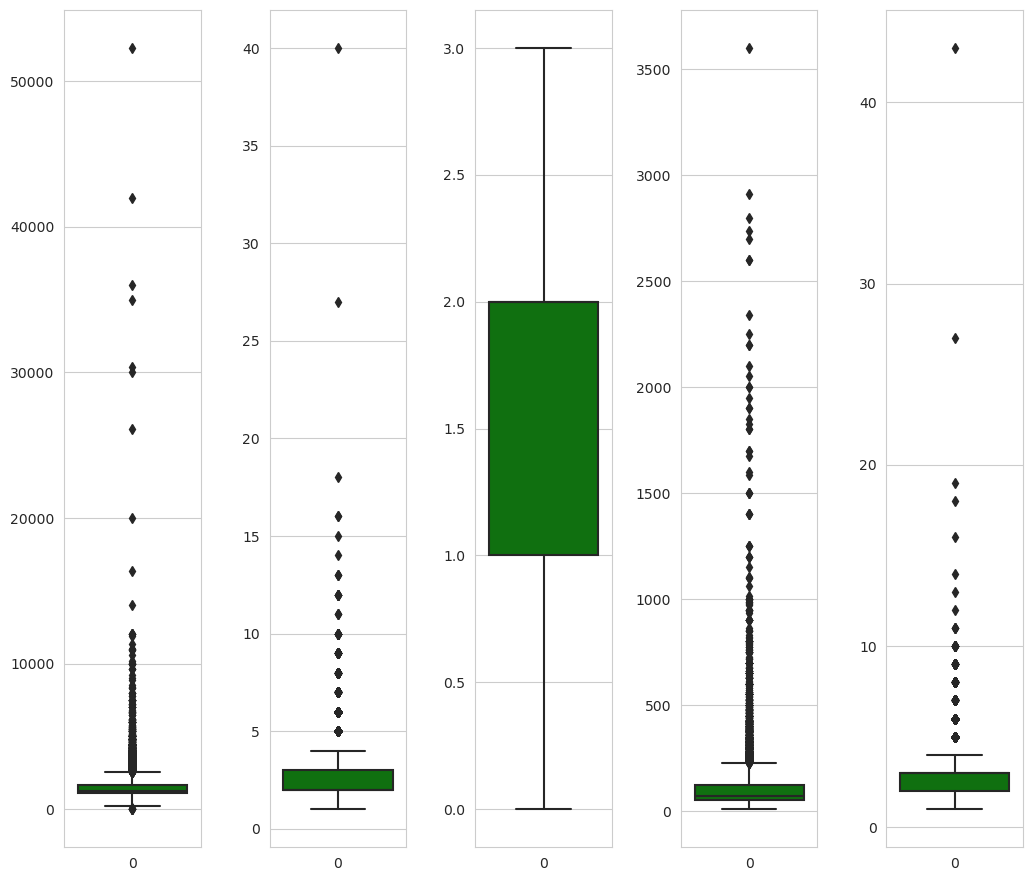

In [42]:
l = df_b.columns.values
print(l)
number_of_columns=7
number_of_rows = len(l)-1//number_of_columns
plt.figure(figsize=(2*number_of_columns,10*number_of_rows))
for i in range(2,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df_b[l[i]],color='green',orient='v')
    plt.tight_layout()
